This code needs to be cleaned. But it run correctly where we have Oct 19 date.

In [ ]:
%ls
#after reconnecting

cc.ru.300.bin  cc.ru.300.bin.gz  sample_data/
time: 105 ms (started: 2024-10-19 12:50:57 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
time: 273 µs (started: 2024-10-19 00:48:00 +00:00)


In [ ]:
import gzip
import gensim
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

time: 2.08 s (started: 2024-10-19 00:48:09 +00:00)


In [ ]:
!pip install fasttext
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296186 sha256=c241dd5632d4bab835d9f0dd1bf904fedc1d47cb7ce4c8473efe3d5ca5fff836
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
time: 55.7 s (started: 2024-10-19 00:48:16 +00:00)


In [ ]:
import numpy as np

time: 311 µs (started: 2024-10-19 00:49:12 +00:00)


In [ ]:
"""
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import os
"""

In [ ]:
%ls

sample_data/
time: 105 ms (started: 2024-10-19 00:49:12 +00:00)


In [ ]:
import fasttext
import fasttext.util

time: 5.78 ms (started: 2024-10-19 00:49:53 +00:00)


The code below will probably work faster with a local version

In [ ]:
# Download the English FastText model
fasttext.util.download_model('ru', if_exists='ignore')

# Load the pre-trained model
model = fasttext.load_model('cc.ru.300.bin')


time: 17min 19s (started: 2024-10-19 00:50:17 +00:00)


In [ ]:
# Create a dictionary of word embeddings
word_embeddings = {}

# Get all words in the vocabulary
words = model.get_words()

for word in words:
    word_embeddings[word] = model.get_word_vector(word)

print(f"Total number of words: {len(word_embeddings)}")
print(f"Dimension of each word vector: {len(next(iter(word_embeddings.values())))}")

# Example: Print the first 5 words and their vector dimensions
for word in list(word_embeddings.keys())[:5]:
    print(f"{word}: {word_embeddings[word].shape}")

Total number of words: 2000000
Dimension of each word vector: 300
,: (300,)
.: (300,)
и: (300,)
в: (300,)
</s>: (300,)
time: 25.7 s (started: 2024-10-19 13:03:36 +00:00)


In [ ]:
# Example: Print the first 5 words and their vector dimensions
for word in list(word_embeddings.keys())[25:50]:
    print(f"{word}: {word_embeddings[word].shape}")

как: (300,)
?: (300,)
а: (300,)
–: (300,)
за: (300,)
;: (300,)
о: (300,)
или: (300,)
это: (300,)
�: (300,)
1: (300,)
...: (300,)
_: (300,)
': (300,)
его: (300,)
у: (300,)
до: (300,)
|: (300,)
2: (300,)
но: (300,)
все: (300,)
года: (300,)
+: (300,)
я: (300,)
то: (300,)
time: 48.7 ms (started: 2024-10-19 01:15:19 +00:00)


In [ ]:
%ls

cc.ru.300.bin  cc.ru.300.bin.gz  sample_data/
time: 105 ms (started: 2024-10-19 01:15:53 +00:00)


In [ ]:
"""import gensim.downloader as api

# Load pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

all_words = list(model.key_to_index.keys())

word_embeddings_w2v = {}
for word in model.key_to_index:
    word_embeddings_w2v[word] = model[word]

print(f"Total number of words: {len(all_words)}")
print(f"Dimension of each word vector: {len(word_embeddings_w2v[all_words[0]])}")"""

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
%ls -lah

total 11G
drwxr-xr-x 1 root root 4.0K Oct 19 01:06 ./
drwxr-xr-x 1 root root 4.0K Oct 19 00:31 ../
-rw-r--r-- 1 root root 6.8G Oct 19 01:07 cc.ru.300.bin
-rw-r--r-- 1 root root 4.2G Oct 19 01:06 cc.ru.300.bin.gz
drwxr-xr-x 4 root root 4.0K Oct 17 13:21 .config/
drwxr-xr-x 1 root root 4.0K Oct 17 13:21 sample_data/
time: 104 ms (started: 2024-10-19 01:16:17 +00:00)


In [ ]:
"""print(len(word_embeddings_w2v.keys()))"""

NameError: name 'word_embeddings_w2v' is not defined

time: 103 ms (started: 2024-10-19 01:16:37 +00:00)


In [ ]:
"""import random

def pick_random_pairs(dictionary, num_pairs,seed):
    random.seed(seed)
    keys = list(dictionary.keys())
    random.shuffle(keys)
    random_pairs = {}
    for key in keys[:num_pairs]:
        random_pairs[key] = dictionary[key]
    return random_pairs

random_embeddings = pick_random_pairs(word_embeddings_glove,400000,7)"""

# we don't have to randomize if we are using all embeddings, but for the sake of using the same code we let it go here

In [ ]:
from sklearn.preprocessing import normalize

def normalize_word_embeddings(embeddings):
    # Extract the word vectors and store them in a numpy array
    embeddings_values = np.array(list(embeddings.values()))

    # Normalize the word embeddings
    normalized_embeddings = normalize(embeddings_values)

    # Update the normalized embeddings back in the dictionary
    for i, word in enumerate(embeddings.keys()):
        embeddings[word] = normalized_embeddings[i]

    return embeddings

time: 697 ms (started: 2024-10-19 01:18:24 +00:00)


In [ ]:
# Call the function to get normalized word embeddings
normalized_embeddings = normalize_word_embeddings(word_embeddings)
#random_normalized_embeddings = normalize_word_embeddings(random_embeddings)
#print(normalized_embeddings)

time: 4.39 s (started: 2024-10-19 01:20:14 +00:00)


In [ ]:
len(normalized_embeddings)

2000000

time: 2.47 ms (started: 2024-10-19 01:21:02 +00:00)


In [ ]:
len(normalized_embeddings.keys())

2000000

time: 2.69 ms (started: 2024-10-19 01:21:36 +00:00)


In [ ]:
'''from sklearn.metrics.pairwise import cosine_similarity

def embedding_cosine_similarity(embedding1,embedding2):
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    return cosine_similarity(embedding1,embedding2)'''

In [ ]:
'''def count_boxes_greater_than(embedding, box_size):
    side_lengths = np.max(embedding, axis=1) - np.min(embedding, axis=1)
    num_boxes = np.sum(side_lengths > box_size)
    return num_boxes'''

In [ ]:
#DO NOT RUN THIS CODE CURRENTLY, NEED TO REVISIT.
'''import numpy as np
import faiss
import matplotlib.pyplot as plt
from scipy.stats import linregress

num_clusters = 256
quantizer = faiss.IndexFlatL2(embedding_vectors.shape[1])
index = faiss.IndexIVFFlat(quantizer, embedding_vectors.shape[1], num_clusters)
index.train(embedding_vectors)
index.add(embedding_vectors)
_, similar_indices = index.search(embedding_vectors, num_similar)


def calculate_fractal_value(embeddings, random_embeddings, box_sizes, k):

    embedding_vectors = np.array(list(embeddings.values()))
    random_vectors = np.array(list(random_embeddings.values()))

    # Initialize Faiss index
    embedding_dim = embedding_vectors.shape[1]
    index = faiss.IndexFlatL2(embedding_dim)

    # Add embeddings to the Faiss index
    index.add(embedding_vectors)

    # Search for the nearest neighbors of all vectors
    neighbor_distances , neighbor_indices = index.search(random_vectors, k)

    # Calculating similarity values using the neighbor_distances and updating it.
    for i in range(neighbor_distances.shape[0]):
        for j in range(neighbor_distances.shape[1]):
            neighbor_distances[i][j] = embedding_cosine_similarity(embedding_vectors[i],embedding_vectors[neighbor_indices[i][j]])

    num_filled_boxes = []

    for box_size in box_sizes:
        side_lengths = np.max(neighbor_distances, axis=1) - np.min(neighbor_distances, axis=1)
        num_boxes = np.sum(side_lengths > box_size)
        num_filled_boxes.append(num_boxes)

    slope, intercept, _, _, _ = linregress(np.log10(box_sizes), np.log10(num_filled_boxes))

    fractal_dimension = -slope

    for i in range(embedding_vectors.shape[0]):
        num_boxes = 0
        num_filled_boxes = 0

        # Iterate over the similarity scores of each vector in chunks of box_size
        for j in range(0,neighbor_distances.shape[1],box_size):
            box_scores = neighbor_distances[i,j:j+box_size]

            for score in box_scores:
                if(score>0.5):
                    num_filled_boxes += 1

            num_boxes+=1

        fractal_dimension = np.log(num_filled_boxes) / np.log(num_boxes)
        fractal_dimensions.append(fractal_dimension)

    return fractal_dimension, num_filled_boxes

#DO NOT RUN THIS CODE CURRENTLY, NEED TO REVISIT.
%%time
box_sizes = np.linspace(0.999, 0.111, 10, endpoint=False)
fractal_dimension, box_counts = calculate_fractal_value(normalized_embeddings,random_normalized_embeddings,box_sizes,1000)
print("Fractal Dimension:", fractal_dimension)

import matplotlib.pyplot as plt

# Plot the graph
plt.plot(box_sizes, box_counts, marker='o', linestyle='-')
plt.xlabel('Box Sizes')
plt.ylabel('Box Counts')
plt.title('Box Counting Graph')
plt.grid(True)
plt.show()'''

In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 27.1 MB/s eta 0:00:00
time: 4.82 s (started: 2024-10-19 01:21:47 +00:00)


In [ ]:
import faiss
import matplotlib.pyplot as plt

In [ ]:
#Using spheres
#This code can be run.

def correlation_dimension_faiss(data, max_radius, num_radii=20,k=100):
    """
    Calculate the correlation dimension of the dataset using Faiss.

    :param data: numpy array of shape (n_samples, n_features)
    :param max_radius: maximum radius for correlation sum calculation
    :param num_radii: number of radii to use for calculation
    :return: radii, correlation_sum
    """
    n_samples, n_features = data.shape

    # Convert data to float32 (required by Faiss)
    data = data.astype(np.float32)

    # Create Faiss index
    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    # Generate radii
    radii = np.logspace(-1, np.log10(max_radius), num_radii)

    # Calculate correlation sum for each radius
    correlation_sum = np.zeros(num_radii)
    for i, r in enumerate(radii):
        # Count number of neighbors within radius r for each point
        #print(index.range_search(data, r**2))
        #neighbors = index.range_search(data, r**2)  # Faiss uses squared distances
        #correlation_sum[i] = len(neighbors) / (n_samples * (n_samples - 1))

        distances, _ = index.search(data, k)

        # Count number of neighbors within radius r for each point
        count_within_radius = np.sum(distances < r**2, axis=1) - 1  # subtract 1 to exclude the point itself
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    """
    Estimate fractal dimension from the slope of log-log plot.

    :param radii: array of radii used
    :param correlation_sum: array of correlation sums
    :return: estimated fractal dimension
    """
    log_radii = np.log(radii)
    log_correlation_sum = np.log(correlation_sum)

    print(log_radii,log_correlation_sum)
    # Linear regression to find slope
    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

time: 27.2 ms (started: 2024-10-19 01:22:16 +00:00)


In [ ]:
"""if __name__ == "__main__":

    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])
    embeddings_list = list(random_normalized_embeddings.values())

    # Convert to a NumPy array with dtype float32
    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    # Calculate correlation dimension
    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)

    # Estimate fractal dimension
    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)

    print(f"Estimated fractal dimension: {fractal_dim:.2f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.loglog(radii, correlation_sum, 'bo-')
    plt.xlabel('Radius (r)')
    plt.ylabel('Correlation Sum C(r)')
    plt.title('Correlation Dimension Analysis')
    plt.grid(True)
    plt.show()

    #Word2vec google news - hugging face 3M words embeddings,Russian National corpus,, fasttext embeddings.
    #Complete works of shakesphere, word to word path connection, Projection wise fractal dimension calculation
    #Understand brazillians code."""
    #we don't randomize in this experiment



```
# This is formatted as code
**KeyboardInterrupt**                         Traceback (most recent call last)
<ipython-input-26-e11b30dddfd9> in <cell line: 1>()
      9     # Calculate correlation dimension
     10     max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
---> 11     radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)
     12
     13     # Estimate fractal dimension

2 frames
/usr/local/lib/python3.10/dist-packages/faiss/swigfaiss.py in search(self, n, x, k, distances, labels)
   2144
   2145     def search(self, n, x, k, distances, labels):
-> 2146         return _swigfaiss.IndexFlat_search(self, n, x, k, distances, labels)
   2147
   2148     def range_search(self, n, x, radius, result):

**KeyboardInterrupt**:
```



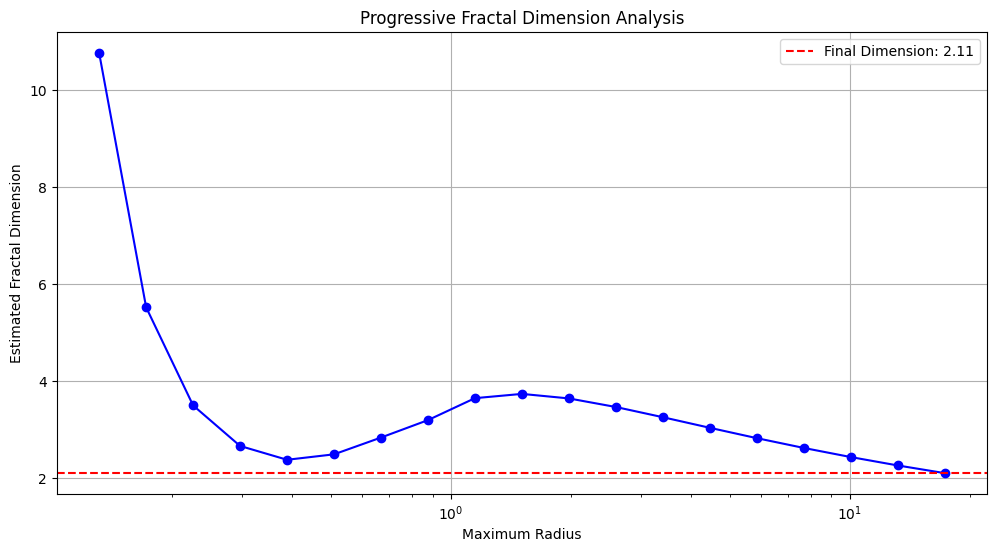

Final estimated fractal dimension: 2.11
Up to radius 0.1312: Estimated dimension = 10.76
Up to radius 0.1720: Estimated dimension = 5.52
Up to radius 0.2257: Estimated dimension = 3.50
Up to radius 0.2960: Estimated dimension = 2.67
Up to radius 0.3882: Estimated dimension = 2.38
Up to radius 0.5092: Estimated dimension = 2.50
Up to radius 0.6679: Estimated dimension = 2.84
Up to radius 0.8761: Estimated dimension = 3.20
Up to radius 1.1491: Estimated dimension = 3.65
Up to radius 1.5073: Estimated dimension = 3.74
Up to radius 1.9770: Estimated dimension = 3.65
Up to radius 2.5932: Estimated dimension = 3.47
Up to radius 3.4013: Estimated dimension = 3.26
Up to radius 4.4613: Estimated dimension = 3.04
Up to radius 5.8517: Estimated dimension = 2.83
Up to radius 7.6754: Estimated dimension = 2.63
Up to radius 10.0675: Estimated dimension = 2.44
Up to radius 13.2051: Estimated dimension = 2.27
Up to radius 17.3205: Estimated dimension = 2.11
time: 1min 35s (started: 2024-10-19 13:08:41

In [ ]:
#Track progressive fractal dimension value, that is if I stop at 10^0 what is the fractal dimension before that?

def correlation_dimension_faiss(data, max_radius, num_radii=20, k=100):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    radii = np.logspace(-1, np.log10(max_radius), num_radii)
    correlation_sum = np.zeros(num_radii)

    distances, _ = index.search(data, k)

    for i, r in enumerate(radii):
        count_within_radius = np.sum(distances < r**2, axis=1) - 1
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    valid_indices = correlation_sum > 0
    log_radii = np.log(radii[valid_indices])
    log_correlation_sum = np.log(correlation_sum[valid_indices])

    if len(log_radii) < 2:
        return np.nan

    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

def progressive_fractal_dimension(data, max_radius, num_radii=20, k=100):
    radii, correlation_sum = correlation_dimension_faiss(data, max_radius, num_radii, k)
    progressive_dimensions = []

    for i in range(2, len(radii) + 1):
        dim = estimate_fractal_dimension(radii[:i], correlation_sum[:i])
        progressive_dimensions.append(dim)

    return radii[1:], progressive_dimensions

# Example usage
if __name__ == "__main__":



    n_samples, n_features = len(normalized_embeddings), len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    embeddings_list = embeddings_list[0:100000]

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    max_radius = np.sqrt(n_features)
    radii, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_radius)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(radii, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Maximum Radius')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()

    print(f"Final estimated fractal dimension: {final_dim:.2f}")

    # Print progressive dimensions
    for i, (r, dim) in enumerate(zip(radii, progressive_dims)):
        print(f"Up to radius {r:.4f}: Estimated dimension = {dim:.2f}")

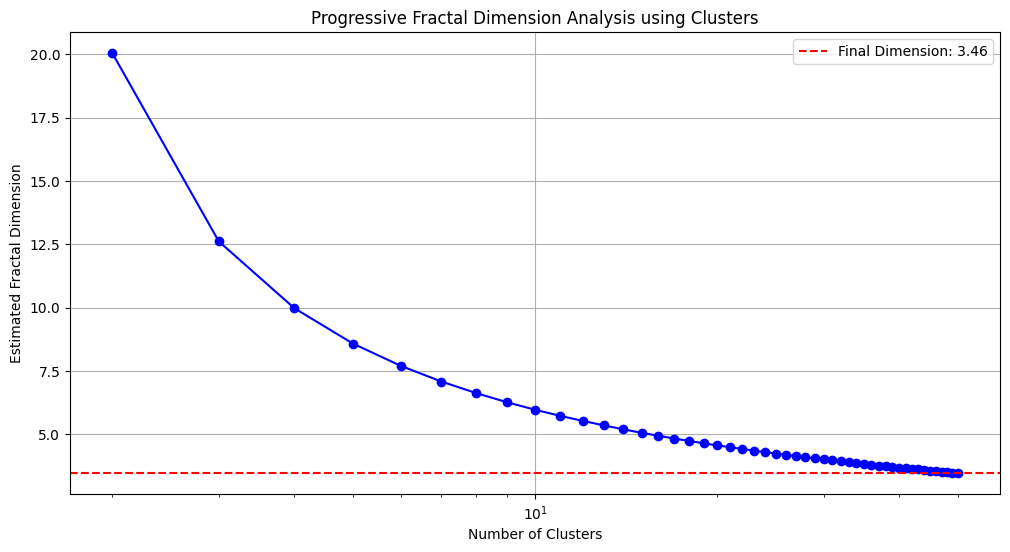


Number of clusters: 2
Cluster sizes: [62663 37337]
Cluster fractal dimensions: [15.93532622 15.18831839]
Total fractal dimension: 20.0496

Number of clusters: 3
Cluster sizes: [33691 40782 25527]
Cluster fractal dimensions: [9.48923121 9.66309607 9.23664527]
Total fractal dimension: 12.6139

Number of clusters: 4
Cluster sizes: [20250 20944 26132 32674]
Cluster fractal dimensions: [7.15281714 7.17712469 7.33676496 7.49792773]
Total fractal dimension: 9.9762

Number of clusters: 5
Cluster sizes: [18578 20255 18996 16927 25244]
Cluster fractal dimensions: [6.10755674 6.16125473 6.12138165 6.04973027 6.2980645 ]
Total fractal dimension: 8.5786

Number of clusters: 6
Cluster sizes: [21093 24928 14272 15585  7275 16847]
Cluster fractal dimensions: [5.55693813 5.65017075 5.33891687 5.38803582 4.96283081 5.43149237]
Total fractal dimension: 7.6982

Number of clusters: 7
Cluster sizes: [14907 16042  8807 22336 14490 17839  5579]
Cluster fractal dimensions: [4.93835041 4.97605995 4.66789391 5.

In [ ]:
#import faiss
#import matplotlib.pyplot as plt

def cluster_fractal_analysis(data, max_clusters, min_clusters=2):
    #1st row - cluster_sizes
    #2nd row - fractal dimension of each box/cluster
    #3rd row - average.
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    results = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension for each cluster
        cluster_fractal_dims = np.log(cluster_sizes) / np.log(k)

        # Calculate total fractal dimension
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        total_dimension = log_m / log_n if log_n != 0 else np.nan

        # Store results
        results.append({
            'num_clusters': k,
            'cluster_sizes': cluster_sizes,
            'cluster_fractal_dims': cluster_fractal_dims,
            'total_fractal_dim': total_dimension
        })

    return results

def cluster_fractal_dimension(data, max_clusters, min_clusters=2):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    dimensions = []
    cluster_counts = range(min_clusters, max_clusters + 1)

    for k in cluster_counts:
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension using box-counting method
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        dimension = log_m / log_n if log_n != 0 else np.nan

        dimensions.append(dimension)

    return cluster_counts, dimensions

def progressive_fractal_dimension(data, max_clusters, min_clusters=2):
    cluster_counts, dimensions = cluster_fractal_dimension(data, max_clusters, min_clusters)
    return cluster_counts, dimensions

# Example usage
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    n_samples = len(normalized_embeddings)
    n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")